 # **Set up Kaggle API access in Colab**

In [1]:
# Configure Kaggle API
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


# **Download the dataset from Kaggle**

In [2]:
!kaggle datasets download -d ashishjangra27/face-mask-12k-images-dataset


Dataset URL: https://www.kaggle.com/datasets/ashishjangra27/face-mask-12k-images-dataset
License(s): CC0-1.0
 94% 311M/330M [00:03<00:00, 91.7MB/s]
100% 330M/330M [00:03<00:00, 114MB/s] 


 # **Unzip the dataset**

In [3]:
import zipfile
import os

# Unzip the dataset
with zipfile.ZipFile("face-mask-12k-images-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("face_mask_12k")

# Check the directory structure
os.listdir("face_mask_12k")


['Face Mask Dataset']

# **Explore dataset folders**

# **Count images per class**

In [4]:
# List subfolders to confirm structure
image_root = "face_mask_12k/Face Mask Dataset/"

for folder in os.listdir(image_root):
    print(f"{folder} => {len(os.listdir(os.path.join(image_root, folder)))} images")


Test => 2 images
Train => 2 images
Validation => 2 images


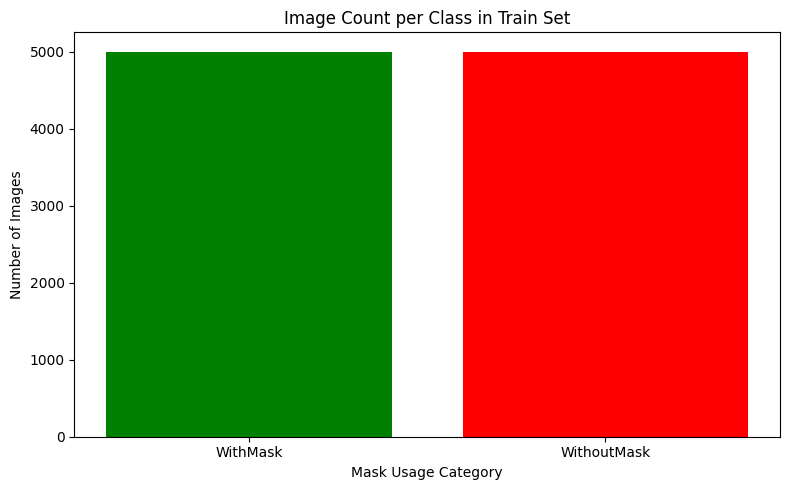

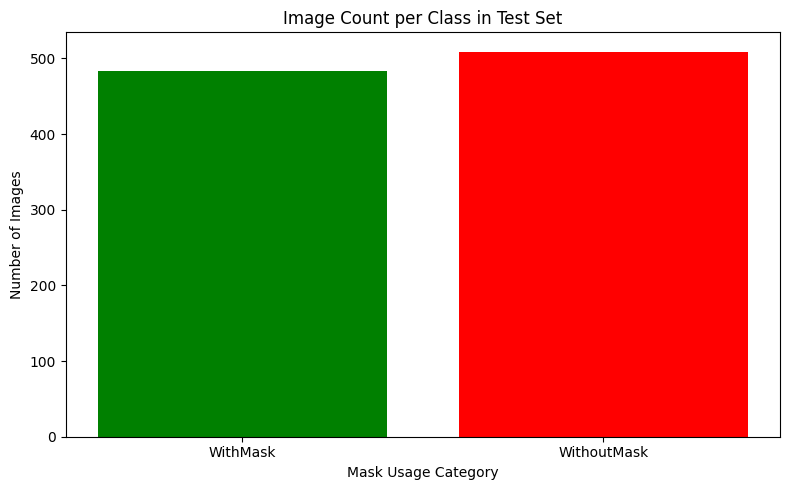

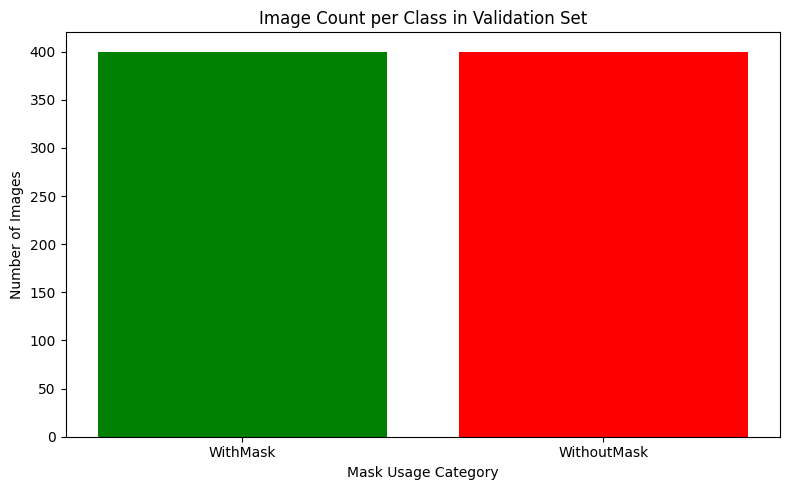

In [7]:
import os
import matplotlib.pyplot as plt

splits = ['Train', 'Test', 'Validation']
root_path = "/content/face_mask_12k/Face Mask Dataset/"

for split in splits:
    split_path = os.path.join(root_path, split)
    labels = []
    image_counts = []

    for category in os.listdir(split_path):
        category_path = os.path.join(split_path, category)
        if os.path.isdir(category_path):
            labels.append(category)
            image_counts.append(len(os.listdir(category_path)))

    # Plotting
    plt.figure(figsize=(8, 5))
    plt.bar(labels, image_counts, color=['green', 'red', 'orange'])
    plt.title(f"Image Count per Class in {split} Set")
    plt.xlabel("Mask Usage Category")
    plt.ylabel("Number of Images")
    plt.tight_layout()
    plt.show()


📊 Total number of images per class across all splits:

WithMask: 5883 images
WithoutMask: 5909 images


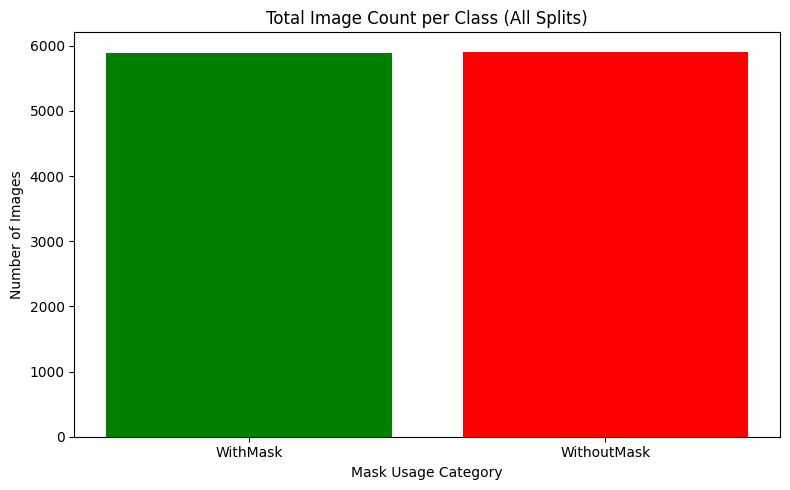

In [9]:
import os
from collections import defaultdict

# Root path to dataset
root_path = "/content/face_mask_12k/Face Mask Dataset"
splits = ['Train', 'Test', 'Validation']
class_counts = defaultdict(int)

# Count images for each class across all splits
for split in splits:
    split_path = os.path.join(root_path, split)

    for category in os.listdir(split_path):
        category_path = os.path.join(split_path, category)
        if os.path.isdir(category_path):
            num_images = len(os.listdir(category_path))
            class_counts[category] += num_images

# Display results
print("📊 Total number of images per class across all splits:\n")
for category, count in class_counts.items():
    print(f"{category}: {count} images")

# Optional: Plot results
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(class_counts.keys(), class_counts.values(), color=['green', 'red', 'orange'])
plt.title("Total Image Count per Class (All Splits)")
plt.xlabel("Mask Usage Category")
plt.ylabel("Number of Images")
plt.tight_layout()
plt.show()


# **Display sample images from each class**

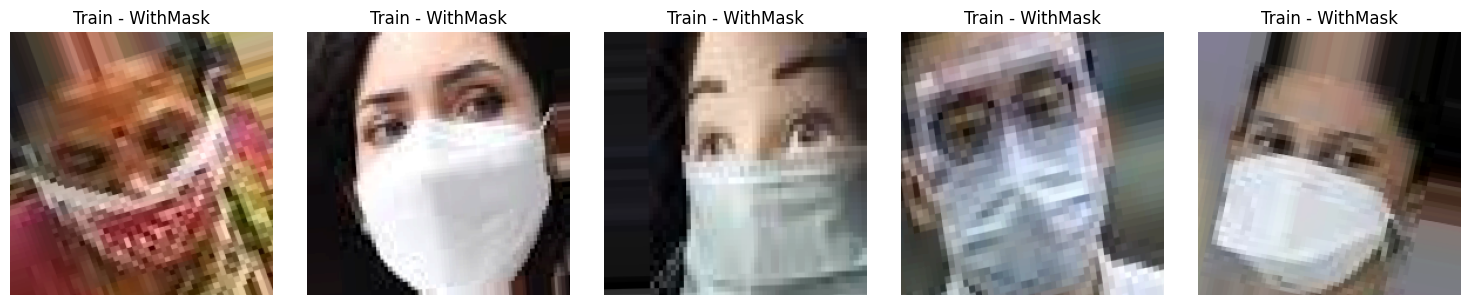

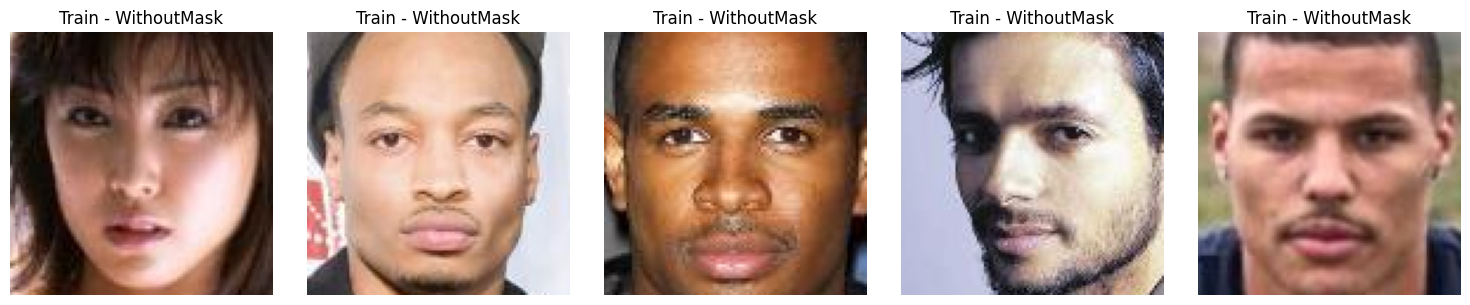

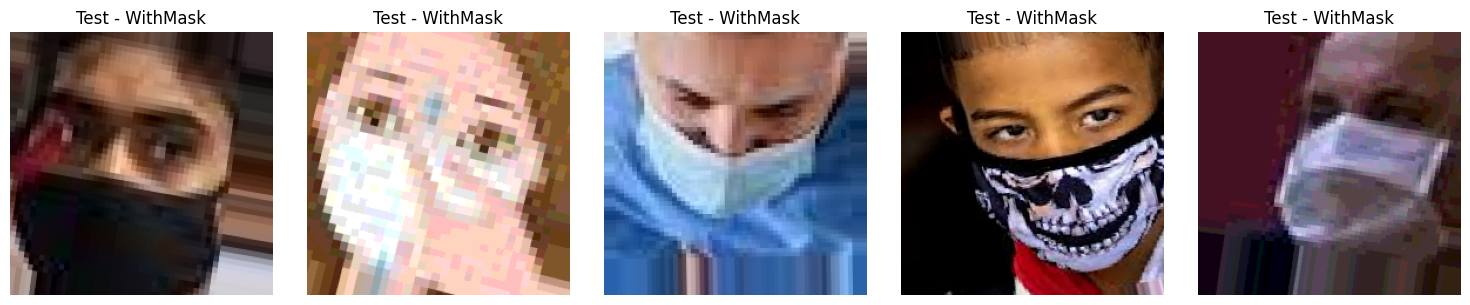

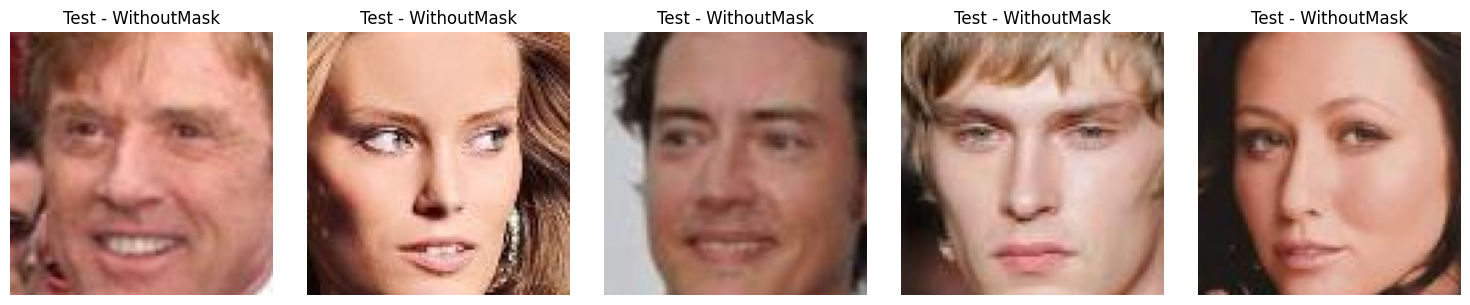

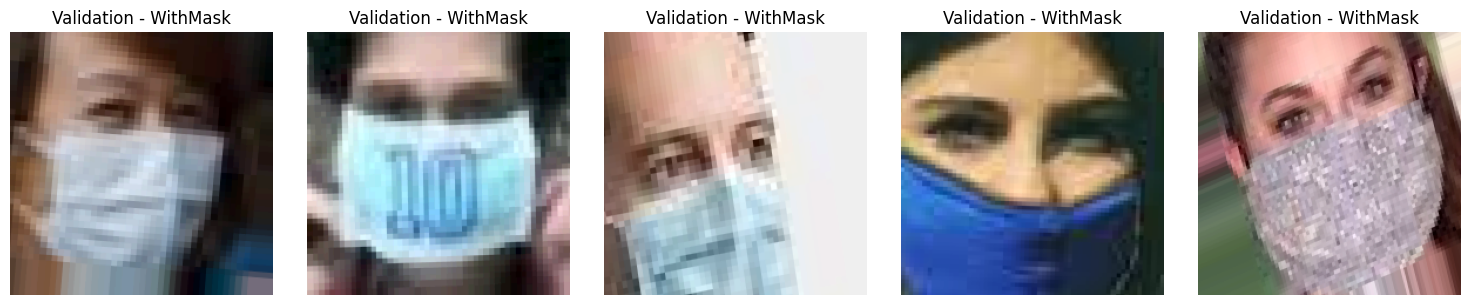

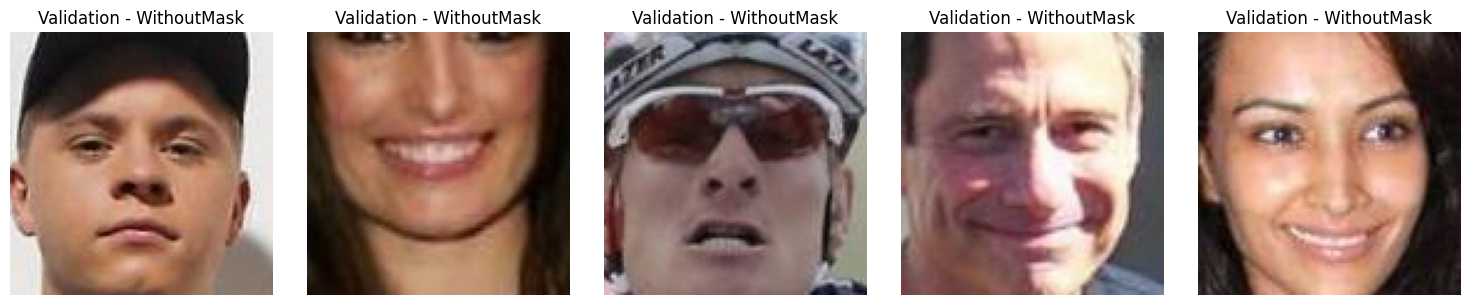

In [10]:
import os
import cv2
import random
import matplotlib.pyplot as plt

# Define dataset root and splits
dataset_root = "/content/face_mask_12k/Face Mask Dataset"
splits = ['Train', 'Test', 'Validation']

def show_sample_images(split, label_folder):
    path = os.path.join(dataset_root, split, label_folder)
    sample_imgs = random.sample(os.listdir(path), 5)
    plt.figure(figsize=(15, 3))
    for i, img_name in enumerate(sample_imgs):
        img_path = os.path.join(path, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, 5, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"{split} - {label_folder}")
    plt.tight_layout()
    plt.show()

# Loop through all splits and all labels in each split
for split in splits:
    split_path = os.path.join(dataset_root, split)
    class_labels = os.listdir(split_path)

    for lbl in class_labels:
        show_sample_images(split, lbl)
